<span style="font-size: 150%;color:white;background:black"> MATERIAŁ na artykół do gazety 
    
<span style="font-size: 250%;color:white;background:red"> Przegląd Zbożowo Młynarski 

<span style="font-size: 160%;color:#0000ff"> Analiza porównawcza zużycia prądu w młynach ZA POMOCĄ Programowania liniowego DEA-CCR.

<span style="font-size: 150%;color:white;background:#1155cc"> Data envelopment analysis (DEA)
    
Envelopment analiza danych (DEA), czasami nazywany analiza granica została po raz pierwszy przedstawiona przez Charnes, Cooper i Rodos w roku 1978. Jest to technika pomiaru wydajności, które, jak się przekonamy, może być stosowany do oceny względnej skuteczności w procesie decyzyjnym jednostek ( DMU ) w organizacjach. W tym przypadku DMU jest odrębną jednostką w organizacji, która ma elastyczność w odniesieniu do niektórych decyzji, które podejmuje, ale niekoniecznie pełną swobodę w odniesieniu do tych decyzji.

Przykładami takich jednostek, do których zastosowano DEA, są: banki, posterunki policji, szpitale, urzędy skarbowe, więzienia, bazy obronne (wojsko, marynarka wojenna, siły powietrzne), szkoły i wydziały uniwersyteckie. Należy zauważyć, że jedną z zalet DEA jest to, że można go zastosować do organizacji non-profit.

Od czasu pierwszego zaproponowania tej techniki wykonano wiele prac teoretycznych i empirycznych. Opublikowano wiele badań dotyczących stosowania DEA w rzeczywistych sytuacjach. Oczywiście niepublikowanych opracowań jest znacznie więcej, np. Wykonanych wewnętrznie przez firmy lub konsultantów zewnętrznych.

Na początku zilustrujemy DEA na małym przykładzie. Więcej o DEA można znaleźć tutaj . Zwróć uwagę, że wiele z tego, co zobaczysz poniżej, to graficzne (obrazowe) podejście do DEA. Jest to bardzo przydatne, jeśli próbujesz wyjaśnić DEA osobom mniej wykwalifikowanym technicznie (takim jak wielu, których możesz spotkać w świecie zarządzania). Istnieje jednak matematyczne podejście do DEA, które można jednak przyjąć - zostanie to zilustrowane poniżej.

http://people.brunel.ac.uk/~mastjjb/jeb/or/dea.html

Zadanie polega na tym, że analizuje się wydajność personelu pracującego w banku, wymyślono różne wskaźniki m.in. wskażnik ilości operacji bankowych na pracownika itp. 

<span style="font-size: 130%;color:#0000ff"> Jednym z problemów związanych z porównaniem za pomocą współczynników jest to, że różne współczynniki mogą dać inny obraz i trudno jest połączyć cały zestaw współczynników w jedną ocenę liczbową.
    
Na przykład rozważmy Dorking i Reigate - Dorking jest (2,75 / 2,09) = 1,32 razy skuteczniejszy niż Reigate w transakcjach osobistych, ale tylko (1,25 / 1,09) = 1,15 razy skuteczniejszy w transakcjach biznesowych. Jak połączyć te liczby w jedą ocenę?
Problem zacznie się gdy takich wskaźników dodamy jeszcze 5 czy 8. Jak wtedy ocenić? Przez średnią? 

<span style="font-size: 130%;color:#0000ff"> Graficznie w artykule mu wyszedł taki ranking:

 1. Croydon 100%
 2. Dorking 43%
 3. Redhill 100%
 4. Reigate 36%

In [1]:
from beautifultable import BeautifulTable

table = BeautifulTable() 
table.column_headers = ["Młyny","Mąka Rozczatka" ,"Mąka 550","Mąka 120","Mąka Krupska","Mąka 350", "Liczba " ]
table.append_row(["Młyn Wręga",    885, 953, 1582, 1460, 314,1100])
table.append_row(["Młyn Żelechów",    1935,   622, "x", "x", 2347,850])
table.append_row(["Młyn Pawin",    841,   715, 980, 135, 291,1180])
table.append_row(["Młyn Korki",    "x",   955, 2080, 2126, "x",780])
print(table)

+-----------+------------+----------+----------+----------+----------+---------+
|   Młyny   | Mąka Rozcz | Mąka 550 | Mąka 120 | Mąka Kru | Mąka 350 | Liczba  |
|           |    atka    |          |          |   pska   |          |         |
+-----------+------------+----------+----------+----------+----------+---------+
| Młyn Wręg |    885     |   953    |   1582   |   1460   |   314    |  1100   |
|     a     |            |          |          |          |          |         |
+-----------+------------+----------+----------+----------+----------+---------+
| Młyn Żele |    1935    |   622    |    x     |    x     |   2347   |   850   |
|   chów    |            |          |          |          |          |         |
+-----------+------------+----------+----------+----------+----------+---------+
| Młyn Pawi |    841     |   715    |   980    |   135    |   291    |  1180   |
|     n     |            |          |          |          |          |         |
+-----------+------------+--


Zarząd uznał że:

obszar Wrocławia (x4) jest cztery razy lepiej punktowany niż obaszar Łodzi (x1)


<span style="font-size: 230%;color:green">

$ {x_{4}}-4{x_{1}} >= 0$


In [2]:
F = 2
G = 3
N = 4

Obliczam dla każdego oddziału banku oddzielnie programowanie liniowe

<span style="font-size: 230%;color:#0000ff"> Młyn Wręga

In [3]:
from pulp import *
from fractions import Fraction

# zdefiniowanie problemu- to jest taka platforma do wrzucania na nia wszystkiego

prob = LpProblem("DEA_Młyn_Wręga",LpMaximize)

In [4]:
# "Continuous"
# "Integer"

x1=LpVariable("x1",lowBound=0,upBound=None, cat="Continuous")
x2=LpVariable("x2",lowBound=0,upBound=None, cat="Continuous")
x3=LpVariable("x3",lowBound=0,upBound=None, cat="Continuous")
x4=LpVariable("x4",lowBound=0,upBound=None, cat="Continuous")
x5=LpVariable("x5",lowBound=0,upBound=None, cat="Continuous")
x6=LpVariable("x6",lowBound=0,upBound=None, cat="Continuous")

In [5]:
from beautifultable import BeautifulTable

table = BeautifulTable() 
table.column_headers = ["Młyny","Mąka Rozczatka" ,"Mąka 550","Mąka 120","Mąka Krupska","Mąka 350", "Liczba " ]
table.append_row(["Młyn Wręga",    885, 953, 1582, 1460, 314,1100])
table.append_row(["Młyn Żelechów",    1935,   622, "x", "x", 2347,850])
table.append_row(["Młyn Pawin",    841,   715, 980, 135, 291,1180])
table.append_row(["Młyn Korki",    "x",   955, 2080, 2126, "x",780])
print(table)

+-----------+------------+----------+----------+----------+----------+---------+
|   Młyny   | Mąka Rozcz | Mąka 550 | Mąka 120 | Mąka Kru | Mąka 350 | Liczba  |
|           |    atka    |          |          |   pska   |          |         |
+-----------+------------+----------+----------+----------+----------+---------+
| Młyn Wręg |    885     |   953    |   1582   |   1460   |   314    |  1100   |
|     a     |            |          |          |          |          |         |
+-----------+------------+----------+----------+----------+----------+---------+
| Młyn Żele |    1935    |   622    |    x     |    x     |   2347   |   850   |
|   chów    |            |          |          |          |          |         |
+-----------+------------+----------+----------+----------+----------+---------+
| Młyn Pawi |    841     |   715    |   980    |   135    |   291    |  1180   |
|     n     |            |          |          |          |          |         |
+-----------+------------+--

<span style="font-size: 130%;color:black"> FUNKCJA CELU

<span style="font-size: 130%;color:black">$ {885x_{1}} + 953x_{2}+ 1582x_{3}+ 1460x_{4}+ 314x_{5} \to max$

przy warunku, że dla Wręgi:

<span style="font-size: 130%;color:black">$1100x_{6}=1$

In [6]:
# objective function
prob += 885*x1 + 953*x2+1582*x3+1460*x4+314*x5, "Maksymalizacja"

In [7]:
print(prob)

DEA_Młyn_Wręga:
MAXIMIZE
885*x1 + 953*x2 + 1582*x3 + 1460*x4 + 314*x5 + 0
VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous
x4 Continuous
x5 Continuous



In [8]:
from beautifultable import BeautifulTable

table = BeautifulTable() 
table.column_headers = ["Młyny","Mąka Rozczatka" ,"Mąka 550","Mąka 120","Mąka Krupska","Mąka 350", "Liczba " ]
table.append_row(["Młyn Wręga",    885, 953, 1582, 1460, 314,1100])
table.append_row(["Młyn Żelechów",    1935,   622, "x", "x", 2347,850])
table.append_row(["Młyn Pawin",    841,   715, 980, 135, 291,1180])
table.append_row(["Młyn Korki",    "x",   955, 2080, 2126, "x",780])
print(table)

+-----------+------------+----------+----------+----------+----------+---------+
|   Młyny   | Mąka Rozcz | Mąka 550 | Mąka 120 | Mąka Kru | Mąka 350 | Liczba  |
|           |    atka    |          |          |   pska   |          |         |
+-----------+------------+----------+----------+----------+----------+---------+
| Młyn Wręg |    885     |   953    |   1582   |   1460   |   314    |  1100   |
|     a     |            |          |          |          |          |         |
+-----------+------------+----------+----------+----------+----------+---------+
| Młyn Żele |    1935    |   622    |    x     |    x     |   2347   |   850   |
|   chów    |            |          |          |          |          |         |
+-----------+------------+----------+----------+----------+----------+---------+
| Młyn Pawi |    841     |   715    |   980    |   135    |   291    |  1180   |
|     n     |            |          |          |          |          |         |
+-----------+------------+--

In [9]:
 (885+953+1582+1460+314)/1100

4.721818181818182

In [10]:
(1935+622+ 2347)/850

5.7694117647058825

In [11]:
(841+715+980+135+291)/1180

2.510169491525424

In [12]:
( 955+2080+2126)/780

6.616666666666666

##### $
\left\{
\begin{align} 
y_{A} = \frac{885x_{1} + 953x_{2}+ 1582x_{3}+1460x_{4}+314x_{5}}{1100x_{6}}&&(1)\\
y_{B} = \frac{1935x_{1} + 622x_{2}+2347x_{5}}{850x_{6}} & & (2)\\
y_{C} = \frac{841x_{1} + 715x_{2}+980x_{3}+135x_{4}+291x_{5}}{1180x_{6}} & & (3)\\
y_{D} = \frac{955x_{2} + 2080x_{3}+2126x_{4}}{780x_{6}} & & (3)\\
\end{align}
\right. 
$


##### $
\left\{
\begin{align} 
(885x_{1}  + 953x_{2}+ 1582x_{3}+1460x_{4}+314x_{5})-1100x_{6} & \leqslant 0& (6)\\
(1935x_{1} + 622x_{2}+ 2347x_{5})-850x_{6} & \leqslant 0& (7)\\
(841x_{1} + 715x_{2}+980x_{3}+135x_{4}+291x_{5})-1180x_{6} & \leqslant 0& (8)\\
(955x_{2}+2080x_{3}+2126x_{4})-780x_{6} & \leqslant 0& (8)\\
\end{align}
\right. 
$

Warunki znakowe:
#### $
\left\{
\begin{align} 
{x_{1}} & \geqslant 0& (11)\\
{x_{2}} & \geqslant 0& (12)\\
{x_{3}} & \geqslant 0& (13)\\
{x_{4}} & \geqslant 0& (14)\\
{x_{5}} & \geqslant 0& (15)\\
{x_{6}} & \geqslant 0& (15)\\
\end{align}
\right. 
$

#### $
\left\{
\begin{align} 
{1100x_{6}} & = 1& (12)\\
\end{align}
\right. 
$

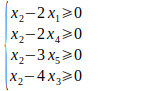

In [13]:
# main constraints
prob += (885*x1+953*x2+1582*x3+1460*x4+314*x5)-1100*x6 <= 0
prob += (1935*x1+622*x2+2347*x5)-850*x6 <= 0
prob += (841*x1+715*x2+980*x3+135*x4+291*x5)-1180*x6 <= 0
prob += (955*x2+2080*x3+2126*x4)-780*x6 <= 0

prob += x2-(F*x1) >= 0
prob += x2-(F*x4) >= 0
prob += x2-(N*x3) >= 0
prob += x2-(G*x5) >= 0

prob += 1100*x6 == 1

In [14]:
print(prob)

DEA_Młyn_Wręga:
MAXIMIZE
885*x1 + 953*x2 + 1582*x3 + 1460*x4 + 314*x5 + 0
SUBJECT TO
_C1: 885 x1 + 953 x2 + 1582 x3 + 1460 x4 + 314 x5 - 1100 x6 <= 0

_C2: 1935 x1 + 622 x2 + 2347 x5 - 850 x6 <= 0

_C3: 841 x1 + 715 x2 + 980 x3 + 135 x4 + 291 x5 - 1180 x6 <= 0

_C4: 955 x2 + 2080 x3 + 2126 x4 - 780 x6 <= 0

_C5: - 2 x1 + x2 >= 0

_C6: x2 - 2 x4 >= 0

_C7: x2 - 4 x3 >= 0

_C8: x2 - 3 x5 >= 0

_C9: 1100 x6 = 1

VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous
x4 Continuous
x5 Continuous
x6 Continuous



### Rozwiązanie problemu

In [15]:
print("prob.solve",prob.solve())
# status of the solution
print(f"Status: {LpStatus[prob.status]}")

prob.solve 1
Status: Optimal


In [16]:
for v in prob.variables():
    print(f"{v.name} = {str(Fraction(v.varValue).limit_denominator())}")


x1 = 1/4114
x2 = 1/2057
x3 = 79/671180
x4 = 0
x5 = 0
x6 = 1/1100


In [17]:
x1 = 1/4114
x2 = 1/2057
x3 = 79/671180
x4 = 0
x5 = 0
x6 = 1/1100

<span style="font-size: 130%;color:black"> FUNKCJA CELU

<span style="font-size: 130%;color:black">$ {885x_{1}} + 953x_{2}+ 1582x_{3}+ 1460x_{4}+ 314x_{5} \to max$

przy warunku, że dla Wręgi:

<span style="font-size: 130%;color:black">$1100x_{6}=1$

In [18]:
Wręga = (885*x1+953*x2+1582*x3+1460*x4+314*x5)/(1100*x6)
Wręga

0.8646215505085022

Obliczam dla każdego oddziału banku oddzielnie programowanie liniowe

<span style="font-size: 230%;color:#0000ff"> Młyn Żelechów

In [19]:
from pulp import *
from fractions import Fraction

# zdefiniowanie problemu- to jest taka platforma do wrzucania na nia wszystkiego

prob = LpProblem("DEA_Młyn_Żelechów",LpMaximize)

In [20]:
# "Continuous"
# "Integer"

x1=LpVariable("x1",lowBound=0,upBound=None, cat="Continuous")
x2=LpVariable("x2",lowBound=0,upBound=None, cat="Continuous")
x3=LpVariable("x3",lowBound=0,upBound=None, cat="Continuous")
x4=LpVariable("x4",lowBound=0,upBound=None, cat="Continuous")
x5=LpVariable("x5",lowBound=0,upBound=None, cat="Continuous")
x6=LpVariable("x6",lowBound=0,upBound=None, cat="Continuous")

In [21]:
from beautifultable import BeautifulTable

table = BeautifulTable() 
table.column_headers = ["Młyny","Mąka Rozczatka" ,"Mąka 550","Mąka 120","Mąka Krupska","Mąka 350", "Liczba " ]
table.append_row(["Młyn Wręga",    885, 953, 1582, 1460, 314,1100])
table.append_row(["Młyn Żelechów",    1935,   622, "x", "x", 2347,850])
table.append_row(["Młyn Pawin",    841,   715, 980, 135, 291,1180])
table.append_row(["Młyn Korki",    "x",   955, 2080, 2126, "x",780])
print(table)

+-----------+------------+----------+----------+----------+----------+---------+
|   Młyny   | Mąka Rozcz | Mąka 550 | Mąka 120 | Mąka Kru | Mąka 350 | Liczba  |
|           |    atka    |          |          |   pska   |          |         |
+-----------+------------+----------+----------+----------+----------+---------+
| Młyn Wręg |    885     |   953    |   1582   |   1460   |   314    |  1100   |
|     a     |            |          |          |          |          |         |
+-----------+------------+----------+----------+----------+----------+---------+
| Młyn Żele |    1935    |   622    |    x     |    x     |   2347   |   850   |
|   chów    |            |          |          |          |          |         |
+-----------+------------+----------+----------+----------+----------+---------+
| Młyn Pawi |    841     |   715    |   980    |   135    |   291    |  1180   |
|     n     |            |          |          |          |          |         |
+-----------+------------+--

<span style="font-size: 130%;color:black"> FUNKCJA CELU

<span style="font-size: 130%;color:black">$ {1935x_{1}} + 622x_{2}+ 2347x_{5} \to max$ 
    
    przy warunku, że dla Żelechów:

<span style="font-size: 130%;color:black">$850x_{6}=1$

In [22]:
# objective function
prob += 1935*x1 + 622*x2 + 2347*x5, "Maksymalizacja"

In [23]:
print(prob)

DEA_Młyn_Żelechów:
MAXIMIZE
1935*x1 + 622*x2 + 2347*x5 + 0
VARIABLES
x1 Continuous
x2 Continuous
x5 Continuous



In [24]:
from beautifultable import BeautifulTable

table = BeautifulTable() 
table.column_headers = ["Młyny","Mąka Rozczatka" ,"Mąka 550","Mąka 120","Mąka Krupska","Mąka 350", "Liczba " ]
table.append_row(["Młyn Wręga",    885, 953, 1582, 1460, 314,1100])
table.append_row(["Młyn Żelechów",    1935,   622, "x", "x", 2347,850])
table.append_row(["Młyn Pawin",    841,   715, 980, 135, 291,1180])
table.append_row(["Młyn Korki",    "x",   955, 2080, 2126, "x",780])
print(table)

+-----------+------------+----------+----------+----------+----------+---------+
|   Młyny   | Mąka Rozcz | Mąka 550 | Mąka 120 | Mąka Kru | Mąka 350 | Liczba  |
|           |    atka    |          |          |   pska   |          |         |
+-----------+------------+----------+----------+----------+----------+---------+
| Młyn Wręg |    885     |   953    |   1582   |   1460   |   314    |  1100   |
|     a     |            |          |          |          |          |         |
+-----------+------------+----------+----------+----------+----------+---------+
| Młyn Żele |    1935    |   622    |    x     |    x     |   2347   |   850   |
|   chów    |            |          |          |          |          |         |
+-----------+------------+----------+----------+----------+----------+---------+
| Młyn Pawi |    841     |   715    |   980    |   135    |   291    |  1180   |
|     n     |            |          |          |          |          |         |
+-----------+------------+--

##### $
\left\{
\begin{align} 
y_{A} = \frac{885x_{1} + 953x_{2}+ 1582x_{3}+1460x_{4}+314x_{5}}{1100x_{6}}&&(1)\\
y_{B} = \frac{1935x_{1} + 622x_{2}+2347x_{5}}{850x_{6}} & & (2)\\
y_{C} = \frac{841x_{1} + 715x_{2}+980x_{3}+135x_{4}+291x_{5}}{1180x_{6}} & & (3)\\
y_{D} = \frac{955x_{2} + 2080x_{3}+2126x_{4}}{780x_{6}} & & (3)\\
\end{align}
\right. 
$


##### $
\left\{
\begin{align} 
(885x_{1}  + 953x_{2}+ 1582x_{3}+1460x_{4}+314x_{5})-1100x_{6} & \leqslant 0& (6)\\
(1935x_{1} + 622x_{2}+ 2347x_{5})-850x_{6} & \leqslant 0& (7)\\
(841x_{1} + 715x_{2}+980x_{3}+135x_{4}+291x_{5})-1180x_{6} & \leqslant 0& (8)\\
(955x_{2}+2080x_{3}+2126x_{4})-780x_{6} & \leqslant 0& (8)\\
\end{align}
\right. 
$

Warunki znakowe:
#### $
\left\{
\begin{align} 
{x_{1}} & \geqslant 0& (11)\\
{x_{2}} & \geqslant 0& (12)\\
{x_{3}} & \geqslant 0& (13)\\
{x_{4}} & \geqslant 0& (14)\\
{x_{5}} & \geqslant 0& (15)\\
{x_{6}} & \geqslant 0& (15)\\
\end{align}
\right. 
$

#### $
\left\{
\begin{align} 
{850x_{6}} & = 1& (12)\\
\end{align}
\right. 
$

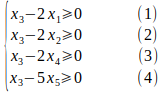

In [25]:
# main constraints
prob += (885*x1+953*x2+1582*x3+1460*x4+314*x5)-1100*x6 <= 0
prob += (1935*x1+622*x2+2347*x5)-850*x6 <= 0
prob += (841*x1+715*x2+980*x3+135*x4+291*x5)-1180*x6 <= 0
prob += (955*x2+2080*x3+2126*x4)-780*x6 <= 0

prob += x2-(F*x1) >= 0
prob += x2-(F*x4) >= 0
prob += x2-(N*x3) >= 0
prob += x2-(G*x5) >= 0


prob += 850*x6 == 1

In [26]:
print(prob)

DEA_Młyn_Żelechów:
MAXIMIZE
1935*x1 + 622*x2 + 2347*x5 + 0
SUBJECT TO
_C1: 885 x1 + 953 x2 + 1582 x3 + 1460 x4 + 314 x5 - 1100 x6 <= 0

_C2: 1935 x1 + 622 x2 + 2347 x5 - 850 x6 <= 0

_C3: 841 x1 + 715 x2 + 980 x3 + 135 x4 + 291 x5 - 1180 x6 <= 0

_C4: 955 x2 + 2080 x3 + 2126 x4 - 780 x6 <= 0

_C5: - 2 x1 + x2 >= 0

_C6: x2 - 2 x4 >= 0

_C7: x2 - 4 x3 >= 0

_C8: x2 - 3 x5 >= 0

_C9: 850 x6 = 1

VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous
x4 Continuous
x5 Continuous
x6 Continuous



### Rozwiązanie problemu

In [27]:
print("prob.solve",prob.solve())
# status of the solution
print(f"Status: {LpStatus[prob.status]}")

prob.solve 1
Status: Optimal


In [28]:
for v in prob.variables():
    print(f"{v.name} = {str(Fraction(v.varValue).limit_denominator())}")


x1 = 196/942663
x2 = 78/81175
x3 = 0
x4 = 0
x5 = 0
x6 = 1/850


In [29]:
x1 = 196/942663
x2 = 78/81175
x3 = 0
x4 = 0
x5 = 0
x6 = 1/850

<span style="font-size: 130%;color:black"> FUNKCJA CELU

<span style="font-size: 130%;color:black">$ {1935x_{1}} + 622x_{2}+ 2347x_{5} \to max$ 
    
    przy warunku, że dla Żelechów:

<span style="font-size: 130%;color:black">$850x_{6}=1$

In [30]:
Żelechów = (1935*x1+622*x2+2347*x5)/(850*x6)
Żelechów

0.9999999945504922

Obliczam dla każdego oddziału banku oddzielnie programowanie liniowe

<span style="font-size: 230%;color:#0000ff"> Młyn Pawin

In [31]:
from pulp import *
from fractions import Fraction

# zdefiniowanie problemu- to jest taka platforma do wrzucania na nia wszystkiego

prob = LpProblem("DEA_Młyn_Pawin",LpMaximize)

In [32]:
# "Continuous"
# "Integer"

x1=LpVariable("x1",lowBound=0,upBound=None, cat="Continuous")
x2=LpVariable("x2",lowBound=0,upBound=None, cat="Continuous")
x3=LpVariable("x3",lowBound=0,upBound=None, cat="Continuous")
x4=LpVariable("x4",lowBound=0,upBound=None, cat="Continuous")
x5=LpVariable("x5",lowBound=0,upBound=None, cat="Continuous")
x6=LpVariable("x6",lowBound=0,upBound=None, cat="Continuous")

In [33]:
from beautifultable import BeautifulTable

table = BeautifulTable() 
table.column_headers = ["Młyny","Mąka Rozczatka" ,"Mąka 550","Mąka 120","Mąka Krupska","Mąka 350", "Liczba " ]
table.append_row(["Młyn Wręga",    885, 953, 1582, 1460, 314,1100])
table.append_row(["Młyn Żelechów",    1935,   622, "x", "x", 2347,850])
table.append_row(["Młyn Pawin",    841,   715, 980, 135, 291,1180])
table.append_row(["Młyn Korki",    "x",   955, 2080, 2126, "x",780])
print(table)

+-----------+------------+----------+----------+----------+----------+---------+
|   Młyny   | Mąka Rozcz | Mąka 550 | Mąka 120 | Mąka Kru | Mąka 350 | Liczba  |
|           |    atka    |          |          |   pska   |          |         |
+-----------+------------+----------+----------+----------+----------+---------+
| Młyn Wręg |    885     |   953    |   1582   |   1460   |   314    |  1100   |
|     a     |            |          |          |          |          |         |
+-----------+------------+----------+----------+----------+----------+---------+
| Młyn Żele |    1935    |   622    |    x     |    x     |   2347   |   850   |
|   chów    |            |          |          |          |          |         |
+-----------+------------+----------+----------+----------+----------+---------+
| Młyn Pawi |    841     |   715    |   980    |   135    |   291    |  1180   |
|     n     |            |          |          |          |          |         |
+-----------+------------+--

<span style="font-size: 130%;color:black"> FUNKCJA CELU

<span style="font-size: 130%;color:black">$ {841x_{1}} + 715x_{2}+ 980x_{3}+ 135x_{4}+ 291x_{5} \to max$

przy warunku, że dla Pawin:

<span style="font-size: 130%;color:black">$1180x_{6}=1$

In [34]:
# objective function
prob += 841*x1 + 715*x2+980*x3+135*x4+291*x5, "Maksymalizacja"

In [35]:
print(prob)

DEA_Młyn_Pawin:
MAXIMIZE
841*x1 + 715*x2 + 980*x3 + 135*x4 + 291*x5 + 0
VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous
x4 Continuous
x5 Continuous



In [36]:
from beautifultable import BeautifulTable

table = BeautifulTable() 
table.column_headers = ["Młyny","Mąka Rozczatka" ,"Mąka 550","Mąka 120","Mąka Krupska","Mąka 350", "Liczba " ]
table.append_row(["Młyn Wręga",    885, 953, 1582, 1460, 314,1100])
table.append_row(["Młyn Żelechów",    1935,   622, "x", "x", 2347,850])
table.append_row(["Młyn Pawin",    841,   715, 980, 135, 291,1180])
table.append_row(["Młyn Korki",    "x",   955, 2080, 2126, "x",780])
print(table)

+-----------+------------+----------+----------+----------+----------+---------+
|   Młyny   | Mąka Rozcz | Mąka 550 | Mąka 120 | Mąka Kru | Mąka 350 | Liczba  |
|           |    atka    |          |          |   pska   |          |         |
+-----------+------------+----------+----------+----------+----------+---------+
| Młyn Wręg |    885     |   953    |   1582   |   1460   |   314    |  1100   |
|     a     |            |          |          |          |          |         |
+-----------+------------+----------+----------+----------+----------+---------+
| Młyn Żele |    1935    |   622    |    x     |    x     |   2347   |   850   |
|   chów    |            |          |          |          |          |         |
+-----------+------------+----------+----------+----------+----------+---------+
| Młyn Pawi |    841     |   715    |   980    |   135    |   291    |  1180   |
|     n     |            |          |          |          |          |         |
+-----------+------------+--

##### $
\left\{
\begin{align} 
y_{A} = \frac{885x_{1} + 953x_{2}+ 1582x_{3}+1460x_{4}+314x_{5}}{1100x_{6}}&&(1)\\
y_{B} = \frac{1935x_{1} + 622x_{2}+2347x_{5}}{850x_{6}} & & (2)\\
y_{C} = \frac{841x_{1} + 715x_{2}+980x_{3}+135x_{4}+291x_{5}}{1180x_{6}} & & (3)\\
y_{D} = \frac{955x_{2} + 2080x_{3}+2126x_{4}}{780x_{6}} & & (3)\\
\end{align}
\right. 
$


##### $
\left\{
\begin{align} 
(885x_{1}  + 953x_{2}+ 1582x_{3}+1460x_{4}+314x_{5})-1100x_{6} & \leqslant 0& (6)\\
(1935x_{1} + 622x_{2}+ 2347x_{5})-850x_{6} & \leqslant 0& (7)\\
(841x_{1} + 715x_{2}+980x_{3}+135x_{4}+291x_{5})-1180x_{6} & \leqslant 0& (8)\\
(955x_{2}+2080x_{3}+2126x_{4})-780x_{6} & \leqslant 0& (8)\\
\end{align}
\right. 
$

Warunki znakowe:
#### $
\left\{
\begin{align} 
{x_{1}} & \geqslant 0& (11)\\
{x_{2}} & \geqslant 0& (12)\\
{x_{3}} & \geqslant 0& (13)\\
{x_{4}} & \geqslant 0& (14)\\
{x_{5}} & \geqslant 0& (15)\\
{x_{6}} & \geqslant 0& (15)\\
\end{align}
\right. 
$

#### $
\left\{
\begin{align} 
{1180x_{6}} & = 1& (12)\\
\end{align}
\right. 
$

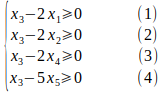

In [37]:
# main constraints
prob += (885*x1+953*x2+1582*x3+1460*x4+314*x5)-1100*x6 <= 0
prob += (1935*x1+622*x2+2347*x5)-850*x6 <= 0
prob += (841*x1+715*x2+980*x3+135*x4+291*x5)-1180*x6 <= 0
prob += (955*x2+2080*x3+2126*x4)-780*x6 <= 0

prob += x2-(F*x1) >= 0
prob += x2-(F*x4) >= 0
prob += x2-(N*x3) >= 0
prob += x2-(G*x5) >= 0


prob += 1180*x6 == 1

In [38]:
print(prob)

DEA_Młyn_Pawin:
MAXIMIZE
841*x1 + 715*x2 + 980*x3 + 135*x4 + 291*x5 + 0
SUBJECT TO
_C1: 885 x1 + 953 x2 + 1582 x3 + 1460 x4 + 314 x5 - 1100 x6 <= 0

_C2: 1935 x1 + 622 x2 + 2347 x5 - 850 x6 <= 0

_C3: 841 x1 + 715 x2 + 980 x3 + 135 x4 + 291 x5 - 1180 x6 <= 0

_C4: 955 x2 + 2080 x3 + 2126 x4 - 780 x6 <= 0

_C5: - 2 x1 + x2 >= 0

_C6: x2 - 2 x4 >= 0

_C7: x2 - 4 x3 >= 0

_C8: x2 - 3 x5 >= 0

_C9: 1180 x6 = 1

VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous
x4 Continuous
x5 Continuous
x6 Continuous



### Rozwiązanie problemu

In [39]:
print("prob.solve",prob.solve())
# status of the solution
print(f"Status: {LpStatus[prob.status]}")

prob.solve 1
Status: Optimal


In [40]:
for v in prob.variables():
    print(f"{v.name} = {str(Fraction(v.varValue).limit_denominator())}")


x1 = 5/22066
x2 = 5/11033
x3 = 61/555944
x4 = 0
x5 = 0
x6 = 1/1180


In [41]:
x1 = 5/22066
x2 = 5/11033
x3 = 61/555944
x4 = 0
x5 = 0
x6 = 1/1180

<span style="font-size: 130%;color:black"> FUNKCJA CELU

<span style="font-size: 130%;color:black">$ {841x_{1}} + 715x_{2}+ 980x_{3}+ 135x_{4}+ 291x_{5} \to max$

przy warunku, że dla Pawin:

<span style="font-size: 130%;color:black">$1180x_{6}=1$

In [42]:
Pawin = (841*x1+715*x2+980*x3+135*x4+291*x5)/(1180*x6)
Pawin

0.6221214017306838

Obliczam dla każdego oddziału banku oddzielnie programowanie liniowe

<span style="font-size: 230%;color:#0000ff"> Młyn Korki

In [43]:
from pulp import *
from fractions import Fraction

# zdefiniowanie problemu- to jest taka platforma do wrzucania na nia wszystkiego

prob = LpProblem("DEA_Młyn_Korki",LpMaximize)

In [44]:
# "Continuous"
# "Integer"

x1=LpVariable("x1",lowBound=0,upBound=None, cat="Continuous")
x2=LpVariable("x2",lowBound=0,upBound=None, cat="Continuous")
x3=LpVariable("x3",lowBound=0,upBound=None, cat="Continuous")
x4=LpVariable("x4",lowBound=0,upBound=None, cat="Continuous")
x5=LpVariable("x5",lowBound=0,upBound=None, cat="Continuous")
x6=LpVariable("x6",lowBound=0,upBound=None, cat="Continuous")

In [45]:
from beautifultable import BeautifulTable

table = BeautifulTable() 
table.column_headers = ["Młyny","Mąka Rozczatka" ,"Mąka 550","Mąka 120","Mąka Krupska","Mąka 350", "Liczba " ]
table.append_row(["Młyn Wręga",    885, 953, 1582, 1460, 314,1100])
table.append_row(["Młyn Żelechów",    1935,   622, "x", "x", 2347,850])
table.append_row(["Młyn Pawin",    841,   715, 980, 135, 291,1180])
table.append_row(["Młyn Korki",    "x",   955, 2080, 2126, "x",780])
print(table)

+-----------+------------+----------+----------+----------+----------+---------+
|   Młyny   | Mąka Rozcz | Mąka 550 | Mąka 120 | Mąka Kru | Mąka 350 | Liczba  |
|           |    atka    |          |          |   pska   |          |         |
+-----------+------------+----------+----------+----------+----------+---------+
| Młyn Wręg |    885     |   953    |   1582   |   1460   |   314    |  1100   |
|     a     |            |          |          |          |          |         |
+-----------+------------+----------+----------+----------+----------+---------+
| Młyn Żele |    1935    |   622    |    x     |    x     |   2347   |   850   |
|   chów    |            |          |          |          |          |         |
+-----------+------------+----------+----------+----------+----------+---------+
| Młyn Pawi |    841     |   715    |   980    |   135    |   291    |  1180   |
|     n     |            |          |          |          |          |         |
+-----------+------------+--

<span style="font-size: 130%;color:black"> FUNKCJA CELU

<span style="font-size: 130%;color:black">$ {955x_{2}} + 2080x_{3}+ 2126x_{4} \to max$

przy warunku, że dla Korki:

<span style="font-size: 130%;color:black">$780x_{6}=1$

In [46]:
# objective function
prob += 955*x2 + 2080*x3+2126*x4, "Maksymalizacja"

In [47]:
print(prob)

DEA_Młyn_Korki:
MAXIMIZE
955*x2 + 2080*x3 + 2126*x4 + 0
VARIABLES
x2 Continuous
x3 Continuous
x4 Continuous



In [48]:
from beautifultable import BeautifulTable

table = BeautifulTable() 
table.column_headers = ["Młyny","Mąka Rozczatka" ,"Mąka 550","Mąka 120","Mąka Krupska","Mąka 350", "Liczba " ]
table.append_row(["Młyn Wręga",    885, 953, 1582, 1460, 314,1100])
table.append_row(["Młyn Żelechów",    1935,   622, "x", "x", 2347,850])
table.append_row(["Młyn Pawin",    841,   715, 980, 135, 291,1180])
table.append_row(["Młyn Korki",    "x",   955, 2080, 2126, "x",780])
print(table)

+-----------+------------+----------+----------+----------+----------+---------+
|   Młyny   | Mąka Rozcz | Mąka 550 | Mąka 120 | Mąka Kru | Mąka 350 | Liczba  |
|           |    atka    |          |          |   pska   |          |         |
+-----------+------------+----------+----------+----------+----------+---------+
| Młyn Wręg |    885     |   953    |   1582   |   1460   |   314    |  1100   |
|     a     |            |          |          |          |          |         |
+-----------+------------+----------+----------+----------+----------+---------+
| Młyn Żele |    1935    |   622    |    x     |    x     |   2347   |   850   |
|   chów    |            |          |          |          |          |         |
+-----------+------------+----------+----------+----------+----------+---------+
| Młyn Pawi |    841     |   715    |   980    |   135    |   291    |  1180   |
|     n     |            |          |          |          |          |         |
+-----------+------------+--

##### $
\left\{
\begin{align} 
y_{A} = \frac{885x_{1} + 953x_{2}+ 1582x_{3}+1460x_{4}+314x_{5}}{1100x_{6}}&&(1)\\
y_{B} = \frac{1935x_{1} + 622x_{2}+2347x_{5}}{850x_{6}} & & (2)\\
y_{C} = \frac{841x_{1} + 715x_{2}+980x_{3}+135x_{4}+291x_{5}}{1180x_{6}} & & (3)\\
y_{D} = \frac{955x_{2} + 2080x_{3}+2126x_{4}}{780x_{6}} & & (3)\\
\end{align}
\right. 
$


##### $
\left\{
\begin{align} 
(885x_{1}  + 953x_{2}+ 1582x_{3}+1460x_{4}+314x_{5})-1100x_{6} & \leqslant 0& (6)\\
(1935x_{1} + 622x_{2}+ 2347x_{5})-850x_{6} & \leqslant 0& (7)\\
(841x_{1} + 715x_{2}+980x_{3}+135x_{4}+291x_{5})-1180x_{6} & \leqslant 0& (8)\\
(955x_{2}+2080x_{3}+2126x_{4})-780x_{6} & \leqslant 0& (8)\\
\end{align}
\right. 
$

Warunki znakowe:
#### $
\left\{
\begin{align} 
{x_{1}} & \geqslant 0& (11)\\
{x_{2}} & \geqslant 0& (12)\\
{x_{3}} & \geqslant 0& (13)\\
{x_{4}} & \geqslant 0& (14)\\
{x_{5}} & \geqslant 0& (15)\\
{x_{6}} & \geqslant 0& (15)\\
\end{align}
\right. 
$

#### $
\left\{
\begin{align} 
{780x_{6}} & = 1& (12)\\
\end{align}
\right. 
$

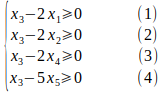

In [49]:
# main constraints
prob += (885*x1+953*x2+1582*x3+1460*x4+314*x5)-1100*x6 <= 0
prob += (1935*x1+622*x2+2347*x5)-850*x6 <= 0
prob += (841*x1+715*x2+980*x3+135*x4+291*x5)-1180*x6 <= 0
prob += (955*x2+2080*x3+2126*x4)-780*x6 <= 0

prob += x2-(F*x1) >= 0
prob += x2-(F*x4) >= 0
prob += x2-(N*x3) >= 0
prob += x2-(G*x5) >= 0

prob += 780*x6 == 1

In [50]:
print(prob)

DEA_Młyn_Korki:
MAXIMIZE
955*x2 + 2080*x3 + 2126*x4 + 0
SUBJECT TO
_C1: 885 x1 + 953 x2 + 1582 x3 + 1460 x4 + 314 x5 - 1100 x6 <= 0

_C2: 1935 x1 + 622 x2 + 2347 x5 - 850 x6 <= 0

_C3: 841 x1 + 715 x2 + 980 x3 + 135 x4 + 291 x5 - 1180 x6 <= 0

_C4: 955 x2 + 2080 x3 + 2126 x4 - 780 x6 <= 0

_C5: - 2 x1 + x2 >= 0

_C6: x2 - 2 x4 >= 0

_C7: x2 - 4 x3 >= 0

_C8: x2 - 3 x5 >= 0

_C9: 780 x6 = 1

VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous
x4 Continuous
x5 Continuous
x6 Continuous



### Rozwiązanie problemu

In [51]:
print("prob.solve",prob.solve())
# status of the solution
print(f"Status: {LpStatus[prob.status]}")

prob.solve 1
Status: Optimal


In [52]:
for v in prob.variables():
    print(f"{v.name} = {str(Fraction(v.varValue).limit_denominator())}")


x1 = 0
x2 = 1/955
x3 = 0
x4 = 0
x5 = 0
x6 = 1/780


In [53]:
x1 = 0
x2 = 1/955
x3 = 0
x4 = 0
x5 = 0
x6 = 1/780

<span style="font-size: 130%;color:black"> FUNKCJA CELU

<span style="font-size: 130%;color:black">$ {955x_{2}} + 2080x_{3}+ 2126x_{4} \to max$

przy warunku, że dla Korki:

<span style="font-size: 130%;color:black">$780x_{6}=1$

In [54]:
Korki = (955*x2+2080*x3+2126*x4)/(780*x6)
Korki

1.0

In [55]:
print("Wręga:", round(Wręga, 3))
print("Żelechów:", round(Żelechów, 3))
print("Pawin:", round(Pawin, 3))
print("Korki:", round(Korki, 3))

Wręga: 0.865
Żelechów: 1.0
Pawin: 0.622
Korki: 1.0
